<a href="https://colab.research.google.com/github/PinRay22/Big-Data-Analytics-for-Finance/blob/main/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件
from sklearn.metrics import mean_squared_error # 計算 mse 誤差
import matplotlib.pyplot as plt # 畫圖套件
import numpy as np # 數值計算套件
# 輸入股票代號
stock_id = "2330.tw"
# stock_id = "2357.tw"
# stock_id = "2317.tw"
# stock_id = "AAPL"
# stock_id = "NVDA"

'''今天往前算幾天'''
# 資料結束時間
end = dt.date.today()
# 抓取半年資料（現在-過去180天）
start = end - dt.timedelta(days=180)

'''抓取特定時間'''
# start = dt.datetime(2024, 1, 1)  # 指定的開始日期
# end = dt.datetime(2024, 6, 30)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
data = yf.download(stock_id, start=start, end=end).reset_index()

df = data.copy()
df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-04-26,788.0,789.0,782.0,782.0,775.530762,32571247
1,2024-04-29,790.0,795.0,787.0,795.0,788.423218,26765837
2,2024-04-30,797.0,802.0,790.0,790.0,783.464539,39051972
3,2024-05-02,789.0,789.0,772.0,772.0,765.613403,40527228
4,2024-05-03,788.0,788.0,773.0,780.0,773.547302,29901556
...,...,...,...,...,...,...,...
114,2024-10-15,1050.0,1075.0,1050.0,1070.0,1070.000000,42850176
115,2024-10-16,1040.0,1070.0,1035.0,1045.0,1045.000000,52652149
116,2024-10-17,1050.0,1055.0,1030.0,1035.0,1035.000000,54173771
117,2024-10-18,1095.0,1100.0,1075.0,1085.0,1085.000000,85011961


In [2]:
df_stat = df.copy()
df_stat['Date'] = pd.to_datetime(df_stat['Date'])
# 將日期欄位設為索引
df_stat.set_index('Date', inplace=True)

df_stat
# 選擇收盤價作為預測目標
close_prices = df_stat['Close']

# 拆分資料分為訓練集(70%) 和測試集(30%)
train_size = int(len(close_prices) * 0.7)
train, test = close_prices[:train_size], close_prices[train_size:]

print(f"訓練集長度: {len(train)}")
print(f"測試集長度: {len(test)}")

訓練集長度: 83
測試集長度: 36


In [3]:
from statsmodels.tsa.arima.model import ARIMA  # 引入 ARIMA 模型
from math import sqrt  # 引入數學根號
import warnings  # 用來忽略警告訊息（可選）
warnings.filterwarnings("ignore")  # 忽略警告訊息

# 優化 ARIMA 模型參數的函數
def optimize_arima(train, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    best_model = None
    # 使用迴圈迭代 p, d, q 組合找出最佳參數
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    # order=(p, d, q)：非季節性ARIMA部分的參數，p 代表自回歸項，d 代表差分階數，q 代表移動平均項。
                    model = ARIMA(train, order=(p, d, q))

                    # 模型擬合
                    model_fit = model.fit()
                    yhat = model_fit.forecast(steps=len(test))

                    # 計算誤差RMSE
                    error = sqrt(mean_squared_error(test, yhat))

                    # 比較當前誤差與最好模型的誤差，存取最好的模型
                    if error < best_score:
                        # 存取最低的誤差分數, 存取最好的 p, d, q 參數
                        best_score, best_cfg = error, (p, d, q)
                        # 存取最好的模型
                        best_model = model_fit
                except:
                    continue

    return best_cfg, best_model

# 定義 p, d, q 參數範圍
p_values = range(0, 6)
d_values = range(0, 3)
q_values = range(0, 6)

# 找出 ARIMA 模型最佳參數
best_cfg, best_model = optimize_arima(train, p_values, d_values, q_values)

# 印出最佳参数
print(f'最佳參數 {best_cfg}')

# 預測
yhat = best_model.forecast(steps=len(test))

# 計算誤差RMSE
rmse_optimized = sqrt(mean_squared_error(test, yhat))

# 印出誤差RMSE
print(f"RMSE: {rmse_optimized}")

最佳參數 (5, 2, 1)
RMSE: 37.58724090135811


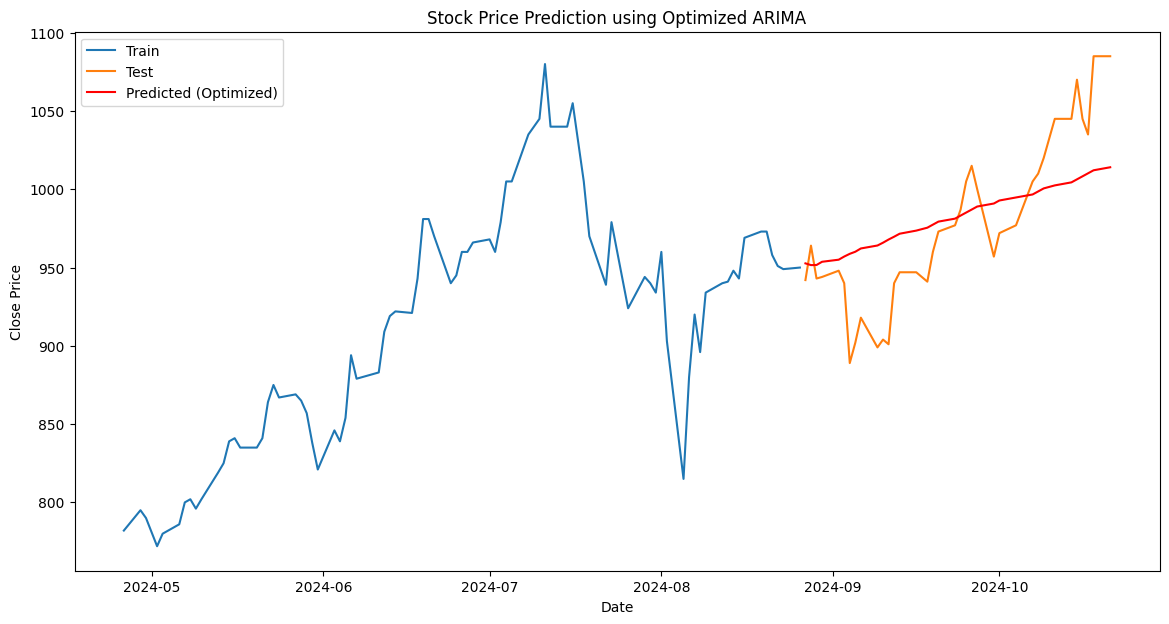

In [4]:
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, yhat, color='red', label='Predicted (Optimized)')
plt.title('Stock Price Prediction using Optimized ARIMA')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed


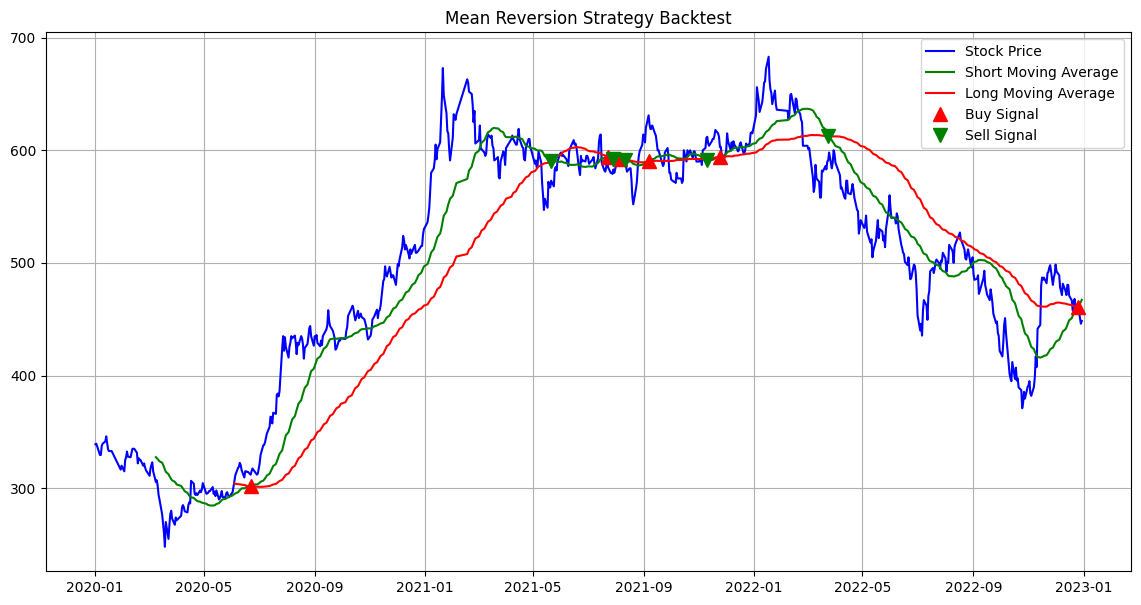

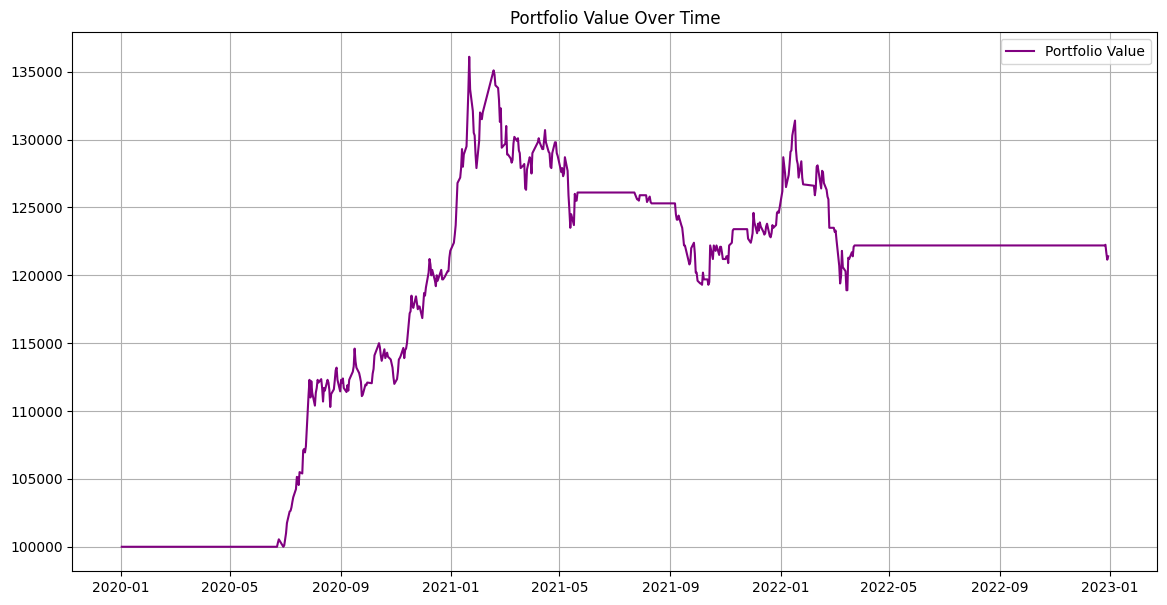

In [5]:
stock_id = "2330.tw"
# stock_id = "2357.tw"
# stock_id = "2317.tw"
# stock_id = "AAPL"
# stock_id = "NVDA"

'''抓取特定時間'''
start = dt.datetime(2020, 1, 1)  # 指定的開始日期
end = dt.datetime(2023, 1, 1)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
stock_data = yf.download(stock_id, start=start, end=end).reset_index()

# 將日期欄位設為資料表索引
stock_data.set_index('Date', inplace=True)
stock_data.index = pd.to_datetime(stock_data.index)

stock_data
def mean_reversion_strategy(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window).mean()

    # 初始訊號：0 代表不操作
    data['Signal'] = 0

    # 短均線高於長均線，發出買入信號
    # .astype('int64') 將 True 變成1，False 變成0
    data.iloc[short_window:, data.columns.get_loc('Signal')] = (
        data['Short_MA'].iloc[short_window:] > data['Long_MA'].iloc[short_window:]
    ).astype('int64')
    # .diff() 使用差分計算買入或賣出(True 代表 1， False代表 0)
    # 當信號從 False（0）變為 True（1）時，1 - 0 = 1 差分為 1，表示買入信號。
    # 當信號從 True（1）變為 False（0）時，0 - 1 = -1 差分為 -1，表示賣出信號。
    data['Position'] = data['Signal'].diff()
    return data

# 回測策略並可視化結果
def backtest_and_plot(data):
    # 資產淨值初始化
    initial_capital = 100000

    # 填空值為 0.0
    positions = pd.DataFrame(index=data.index).fillna(0.0)

    # 買入訊號(1)或賣出訊號(-1) * 股數，-100代表賣100股，100代表買100股
    positions['Stock'] = data['Signal'] * 100  # 每次交易100股

   # 買入或賣出股票數 * 收盤價，計算每個時間點持有的股票價值
    portfolio = positions.multiply(data['Close'], axis=0)

    # 計算每個時間點股票持倉的變化量（買入或賣出股票的數量）
    pos_diff = positions.diff()


    # 計算持有的股票價值（資產組合中持有的部分）
    # 將持倉數量與收盤價相乘，並對每個時間點的所有持倉進行求和，得到當天的總持倉價值
    portfolio['Holdings'] = positions.multiply(data['Close'], axis=0).sum(axis=1)

    # 計算現金部分
    # 初始資金減去所有交易的累積花費/收益，並根據股票價格乘以持倉變動來計算現金變化
    # cumsum() 用來累積計算現金變化，保持隨著時間推移的總現金變化
    portfolio['Cash'] = initial_capital - (pos_diff.multiply(data['Close'], axis=0)).sum(axis=1).cumsum()

    # 計算總資產
    # 總資產 = 現金部分 + 持有的股票價值部分
    portfolio['Total'] = portfolio['Cash'] + portfolio['Holdings']

    # 繪製策略結果
    plt.figure(figsize=(14, 7))
    plt.plot(data['Close'], label='Stock Price', color='blue')
    plt.plot(data['Short_MA'], label='Short Moving Average', color='green')
    plt.plot(data['Long_MA'], label='Long Moving Average', color='red')

    # 標註買賣點
    plt.plot(data[data['Position'] == 1].index,
             data['Short_MA'][data['Position'] == 1],
             '^', markersize=10, color='r', lw=0, label='Buy Signal')

    plt.plot(data[data['Position'] == -1].index,
             data['Short_MA'][data['Position'] == -1],
             'v', markersize=10, color='g', lw=0, label='Sell Signal')

    plt.title('Mean Reversion Strategy Backtest')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # 繪製資產淨值曲線
    plt.figure(figsize=(14, 7))
    plt.plot(portfolio['Total'], label='Portfolio Value', color='purple')
    plt.title('Portfolio Value Over Time')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

 # 設定策略參數：短期移動平均線窗口與長期移動平均線窗口
short_window = 40
long_window = 100

# 應用均值回歸策略
stock_data = mean_reversion_strategy(stock_data, short_window, long_window)

# 回測並可視化結果
backtest_and_plot(stock_data)